In [10]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Saranya.Sakkarapani\\Anaconda3\\envs\\anomaly_detection\\Lib\\site-packages\\tensorflow\\python\\distribute\\cluster_resolver\\slurm_cluster_resolver.py'
Consider using the `--user` option or check the permissions.



  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
     ---------------------------------------- 0.0/272.8 MB ? eta -:--:--
     -------------------------------------- 0.0/272.8 MB 991.0 kB/s eta 0:04:36
     ---------------------------------------- 0.1/272.8 MB 1.1 MB/s eta 0:04:20
     ---------------------------------------- 0.2/272.8 MB 1.4 MB/s eta 0:03:17
     ---------------------------------------- 0.2/272.8 MB 1.3 MB/s eta 0:03:29
     ---------------------------------------- 0.4/272.8 MB 1.6 MB/s eta 0:02:56
     ---------------------------------------- 0.4/272.8 MB 1.7 MB/s eta 0:02:43
     ---------------------------------------- 0.5/272.8 MB 1.5 MB/s eta 0:02:58
     ---------------------------------------- 0.6/272.8 MB 1.5 MB/s eta 0:03:00
     ---------------------------------------- 0.7/272.8 MB 1.5 MB/s eta 0:03:05
     ---------------------------------------- 0.8/272.8 MB 1.7 MB/s eta 0:02:39
     ---------------------------------------- 1.0/272.8 MB 1.

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [105]:
df_norm = pd.read_csv('Normal_Bearing.csv')
df_orf_2 = pd.read_csv('outer_race_fault_test_2.csv')
df_orf_3 = pd.read_csv('outer_race_fault_test_3.csv')
df_irf = pd.read_csv('inner_race_fault.csv')
df_ref = pd.read_csv('roller_element_fault.csv')

df = pd.concat([df_norm,df_orf_2,df_orf_3,df_irf,df_ref])
df = df.reset_index(drop=True)
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor,Fault
0,0.5520,-0.5640,-0.117152,0.088715,0.146993,0.042514,0.975709,3.774804,-1.254731,Normal
1,0.4175,-0.6130,-0.117766,0.088628,0.147432,0.031653,1.020460,2.832186,-1.251913,Normal
2,0.4415,-0.5855,-0.117079,0.087172,0.146011,0.056889,0.932320,3.021907,-1.247192,Normal
3,0.4980,-0.6240,-0.116931,0.089763,0.147452,0.004492,1.038105,3.398210,-1.260966,Normal
4,0.4390,-0.5910,-0.117736,0.087695,0.146865,-0.011644,0.765244,2.981301,-1.247379,Normal
...,...,...,...,...,...,...,...,...,...,...
2273,0.6360,-0.8215,-0.114274,0.134403,0.176426,0.067830,1.292791,3.609385,-1.543961,Roller Element
2274,0.5945,-0.7825,-0.114281,0.131371,0.174157,0.033719,1.293530,3.412258,-1.524060,Roller Element
2275,0.6460,-0.8205,-0.113587,0.131056,0.173459,0.035932,1.335465,3.723053,-1.527302,Roller Element
2276,0.6920,-0.7790,-0.114356,0.132124,0.174755,0.052000,1.139499,3.966227,-1.528189,Roller Element


In [106]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [107]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [109]:
model = RandomForestClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
  
labels=['Normal', 'Outer Race', 'Inner Race', 'Roller Element']    
    


In [110]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [111]:
ac

0.9758771929824561

In [112]:
cm

array([[ 93,   3,   0,   2],
       [  3, 165,   0,   0],
       [  0,   1, 101,   0],
       [  2,   0,   0,  86]], dtype=int64)

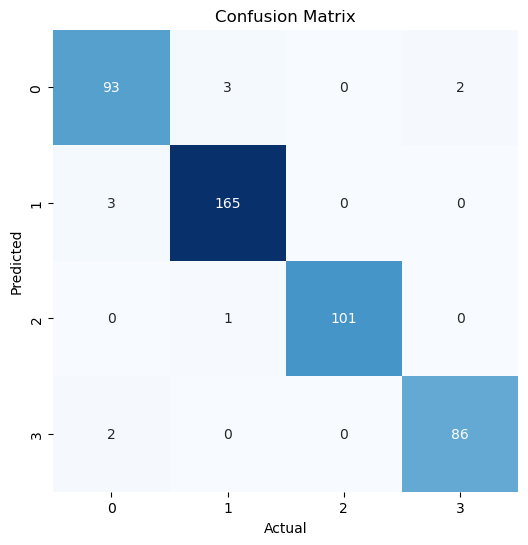

In [114]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

<AxesSubplot:>

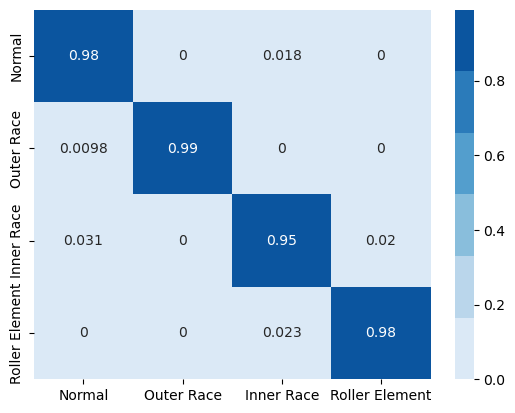

In [113]:
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred,labels=['Normal', 'Outer Race', 'Inner Race', 'Roller Element'], normalize ='true')
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True,cmap=colormap,xticklabels=labels, yticklabels=labels)

In [115]:
clr = classification_report(y_test, y_pred, target_names=['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                 precision    recall  f1-score   support

        Normal       0.95      0.95      0.95        98
    Outer Race       0.98      0.98      0.98       168
    Inner Race       1.00      0.99      1.00       102
Roller Element       0.98      0.98      0.98        88

      accuracy                           0.98       456
     macro avg       0.98      0.97      0.98       456
  weighted avg       0.98      0.98      0.98       456



# Multiclass AUC with train-test-split

In [116]:
import sklearn.metrics as metrics

In [117]:
y_pred_proba = model.predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred_proba, multi_class = 'ovo')

0.9981832289192734

In [118]:
metrics.roc_auc_score(y_test,y_pred_proba, multi_class = 'ovr')

0.9982715600492955

# Multiclass AUC with cross validation

In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
cross_val_score(model, X, y, scoring ='roc_auc_ovo').mean()

0.9615994528513816

TEST-1, inner race defect occurred in bearing 3 and roller element defect in bearing 4.<br>
TEST-2, outer race failure occurred in bearing 1.<br>
TEST-3, outer race failure occurred in bearing 3.<br>

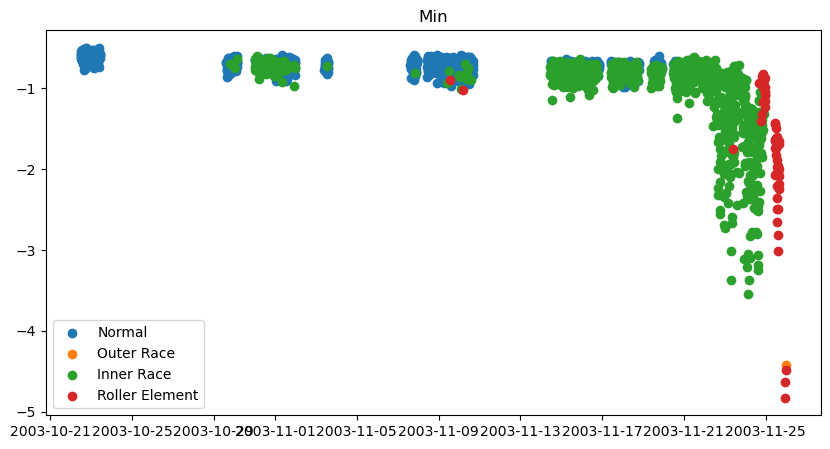

In [40]:
Test_no=1
Bearing_no=3


test_2 = pd.read_csv("Time_feature_matrix_bearing_{}_Test_ {}.csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')
y_pred_test_2 = model.predict(test_2)
test_2['Fault']=y_pred_test_2
test_2.index = pd.to_datetime(test_2.index)


norm = test_2[test_2['Fault']=='Normal']
Out_rac = test_2[test_2['Fault']=='Outer Race']
iner_rac = test_2[test_2['Fault']=='Inner Race']
roll_elem = test_2[test_2['Fault']=='Roller Element']


col='Min'                      
plt.figure(figsize=(10, 5))
plt.scatter(norm.index,norm[col])
plt.scatter(Out_rac.index,Out_rac[col])
plt.scatter(iner_rac.index,iner_rac[col])
plt.scatter(roll_elem.index,roll_elem[col])

plt.legend(['Normal','Outer Race','Inner Race','Roller Element'])
plt.title(col)
plt.show()

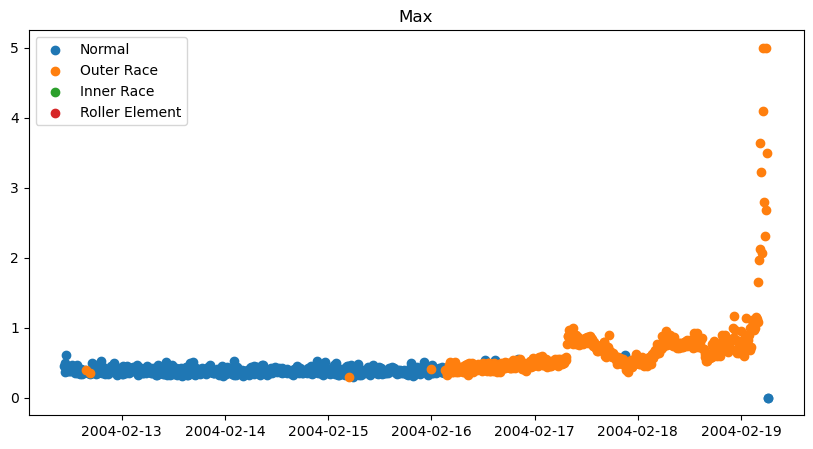

In [39]:
Test_no=2
Bearing_no=1


test_2 = pd.read_csv("Time_feature_matrix_bearing_{}_Test_ {}.csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')
y_pred_test_2 = model.predict(test_2)
test_2['Fault']=y_pred_test_2
test_2.index = pd.to_datetime(test_2.index)


norm = test_2[test_2['Fault']=='Normal']
Out_rac = test_2[test_2['Fault']=='Outer Race']
iner_rac = test_2[test_2['Fault']=='Inner Race']
roll_elem = test_2[test_2['Fault']=='Roller Element']

###############################################################

col='Max'                      # Change this value to any column name 
plt.figure(figsize=(10, 5))
plt.scatter(norm.index,norm[col])
plt.scatter(Out_rac.index,Out_rac[col])
plt.scatter(iner_rac.index,iner_rac[col])
plt.scatter(roll_elem.index,roll_elem[col])

plt.legend(['Normal','Outer Race','Inner Race','Roller Element'])
plt.title(col)
plt.show()

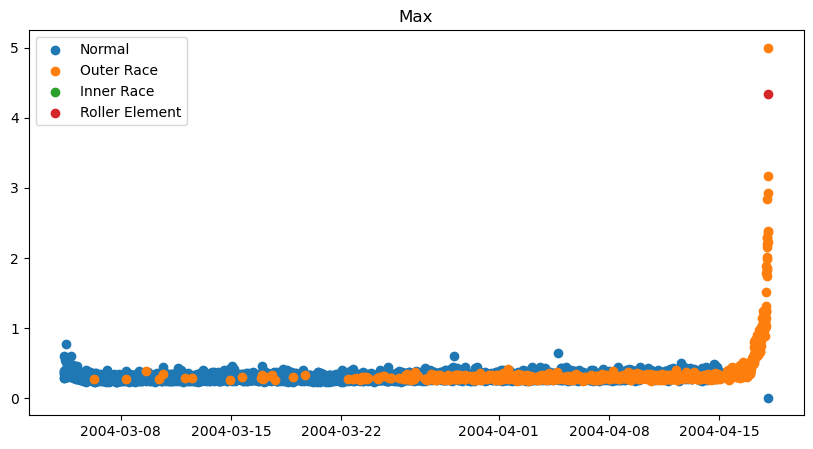

In [41]:
Test_no=3
Bearing_no=3


test_2 = pd.read_csv("Time_feature_matrix_bearing_{}_Test_ {}.csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')
y_pred_test_2 = model.predict(test_2)
test_2['Fault']=y_pred_test_2
test_2.index = pd.to_datetime(test_2.index)


norm = test_2[test_2['Fault']=='Normal']
Out_rac = test_2[test_2['Fault']=='Outer Race']
iner_rac = test_2[test_2['Fault']=='Inner Race']
roll_elem = test_2[test_2['Fault']=='Roller Element']

###############################################################

col='Max'                      # Change this value to any column name 
plt.figure(figsize=(10, 5))
plt.scatter(norm.index,norm[col])
plt.scatter(Out_rac.index,Out_rac[col])
plt.scatter(iner_rac.index,iner_rac[col])
plt.scatter(roll_elem.index,roll_elem[col])

plt.legend(['Normal','Outer Race','Inner Race','Roller Element'])
plt.title(col)
plt.show()

In [79]:
from sklearn.neural_network import MLPClassifier

In [81]:
mlpc=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(512), random_state=10)
score = cross_val_score(mlpc, X, y, cv=5)
print('Fold-wise accuracies: ', score)
print('Mean accuracy: ', np.mean(np.array(score)))

C:\Users\Saranya.Sakkarapani\Anaconda3\envs\anomaly_detection\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Saranya.Sakkarapani\Anaconda3\envs\anomaly_detection\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Saranya.Sakkarapani\Anaconda3\envs\anomaly_detection\lib\site-packages\sklearn\neural_network

Fold-wise accuracies:  [0.63596491 0.75657895 0.82675439 0.91428571 0.93626374]
Mean accuracy:  0.8139695392326971


C:\Users\Saranya.Sakkarapani\Anaconda3\envs\anomaly_detection\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [84]:
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)
  
labels=['Normal', 'Outer Race', 'Inner Race', 'Roller Element']    
    


C:\Users\Saranya.Sakkarapani\Anaconda3\envs\anomaly_detection\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [86]:
clr = classification_report(y_test, y_pred, target_names=['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])
print("Classification Report: mlpc\n----------------------\n", clr)

Classification Report: mlpc
----------------------
                 precision    recall  f1-score   support

        Normal       0.80      0.84      0.82       100
    Outer Race       0.88      0.85      0.87       151
    Inner Race       0.93      0.87      0.90       109
Roller Element       0.81      0.86      0.84        96

      accuracy                           0.86       456
     macro avg       0.86      0.86      0.86       456
  weighted avg       0.86      0.86      0.86       456



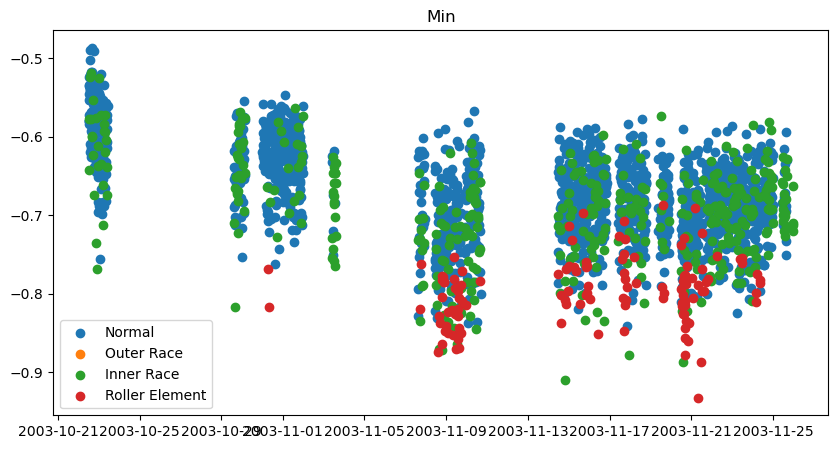

In [89]:
Test_no=1
Bearing_no=1


test_2 = pd.read_csv("Time_feature_matrix_bearing_{}_Test_ {}.csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')
y_pred_test_2 = mlpc.predict(test_2)
test_2['Fault']=y_pred_test_2
test_2.index = pd.to_datetime(test_2.index)


norm = test_2[test_2['Fault']=='Normal']
Out_rac = test_2[test_2['Fault']=='Outer Race']
iner_rac = test_2[test_2['Fault']=='Inner Race']
roll_elem = test_2[test_2['Fault']=='Roller Element']


col='Min'                      
plt.figure(figsize=(10, 5))
plt.scatter(norm.index,norm[col])
plt.scatter(Out_rac.index,Out_rac[col])
plt.scatter(iner_rac.index,iner_rac[col])
plt.scatter(roll_elem.index,roll_elem[col])

plt.legend(['Normal','Outer Race','Inner Race','Roller Element'])
plt.title(col)
plt.show()